## Case Prompt

Currently, NFP has set a target of _25 clients per full-time nurse home visitor_.

**Does careful analysis of data support this as a uniform target and one that best fosters an
efficient and effective level of operations?** And, if not, what standard or standards
would be more appropriate, and under what conditions?

While there are a variety of effectiveness measures available, we encourage participants to
focus on the following outcome metrics for this challenge:

- Low incidence of preterm births (preterm)
- High rates of initiation of breastfeeding (initiated_bf)
- Enrollment or completion of high school (for clients 18 years old or younger) (changeineducation)
- Employment (for clients 19 years or older) (changeinemployment)
- High rate of client retention across pregnancy 

There are also many possible factors of influence available to participants. These include,
but are not limited to, client needs, client risks, nurse turnover, tenure, case mix, and
geographic variation (urban vs rural or state-specific).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### NFP Nurse Info
This dataset provides information about each nurse listed as visiting or being assigned to active clients in the active client list.

It provides nurse FTE information for each nurse by month. Typically, a nurse with 0.5 FTE would be expected to carry a caseload that is half of the caseload of a full-time nurse (FTE=1.0).

Nurse ID variable can be linked to active client dataset (**nurse_id** or **nurse_id_assigned**).

Some nurses could be missing a value for their FTE, students can either impute their FTE value (based on their number of clients each month) or drop these nurses from the analysis. 

| Variable | Description | Format | Values |
|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|------------------------------------------------------------------------------------------------------------------------------------|
| nurse_id | Nurse ID. This identifier can be joined to nurse_id in the active client dataset or nurse_id_assigned in the active client dataset. | numeric |  |
| month | Month of study period. | numeric |  |
| site_id | Agency of employment. Can be joined to site_id in the agency dataset or active client dataset. | numeric |  |
| first_visit_dt | Date of agency hire or first home visit | date |  |
| fte | Nurse Home Visitor full-time equivalent (FTE) -- this is the full-time equivalents specifically assigned to staff member for the nurse home visiting role. This value could be missing for a specific nurse. Students could choose to impute a nurses fte (based on their average number of clients each month) or they can drop these nurses from the analysis. | numeric |  |
| term_flag | Flag if Nurse Home Visitor left the agency during the study period | numeric | 1= Yes, nurse was terminated during study period; "NULL" or "Missing" = the nurse did not leave the agency during the study period |
| nurse_primary_role | Nurse primary role as of during month. Note -- It is possible that nurse supervisors see clients and maintain a caseload, which is why you might see visits performed by nurse supervisors. Other roles such as data manager, program administrator, etc are likely a result of an administrative error. These nurses and their associated clients can be dropped from the analysis if students choose that approach. | character |  |
| numcases_actual | Number of clients the nurse visited during the particular month (based on the 'nurse_id' tag in the active_clients dataset. This field can be divided by the 'fte' field to get a measure of actual caseload per FTE | numeric |  |
| numcases_assigned | Number of cases that the nurse was assigned during the particular month (based on the 'nurse_id_assigned' tag in the active_clients dataset. This field can be divided by the 'fte' field to get a measure of the assigned caseload per FTE | numeric |  |

In [2]:
nfp_nurse_info = pd.read_csv("data/NFP_NURSE_INFO_TRAIN.csv")

In [56]:
nfp_nurse_info.head()

,nurse_id,month,site_id,first_visit_dt,fte,term_flag,nurse_primary_role,numcases_actual,numcases_assigned
0,6165,1,109,30-May-06,1.0,NaN,Nurse Home Visitor,24.0,24.0
1,6165,2,109,30-May-06,1.0,NaN,Nurse Home Visitor,25.0,25.0
2,6165,3,109,30-May-06,1.0,NaN,Nurse Home Visitor,24.0,24.0
3,6165,4,109,30-May-06,1.0,NaN,Nurse Home Visitor,25.0,25.0
4,6165,5,109,30-May-06,1.0,NaN,Nurse Home Visitor,26.0,25.0


In [21]:
nurse_id_count = nfp_nurse_info[['nurse_id', 'site_id']].groupby(['site_id']).agg(['count'])

### NFP Agency

This dataset provides information about each agency. The dataset can be merged with others using the variable site_id. The measures provided show each agencies performance for the entire 12 month study period. 

| Variable              | Description                                                                                                                                                                                                                                                                                                               | Dataset | Format    | 
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------|-----------| 
| state                 | The state of agency                                                                                                                                                                                                                                                                                                       | Agency  | Character | 
| site_id               | The Agency ID                                                                                                                                                                                                                                                                                                             | Agency  | Numeric   | 
| referral_count        | Total count of client referrals to agency during study period. Could have missing values if the site has no referrals or doesn't enter them.                                                                                                                                                                               | Agency  | Numeric   | 
| conversion            | Percent of clients referred to agency that ultimately enrolled in program during study period. This field could have missing values- particularly if they are a new site with not enough follow up time to determine retention at this time point                                                                         | Agency  | Numeric   | 
| percent_retained_preg | Percent of clients retained through pregnancy during study period. This field could have missing values.                                                                                                                                                                                                                  | Agency  | Numeric   | 
| percent_retained_1yr  | Percent of clients retained through 1 year postpartum during the study period. This field could have missing values- particularly if they are a new site with not enough follow up time to determine retention at this time point                                                                                         | Agency  | Numeric   | 
| percent_retained_2yr  | Percent of clients retained through 2 year postpartum during the study period. This field could have missing values- particularly if they are a new site with not enough follow up time to determine retention at this time point                                                                                         | Agency  | Numeric   | 
| first_hv              | Date of agency's first home visit                                                                                                                                                                                                                                                                                         | Agency  | Date      | 
| pct_urban             | Percent urbanicity of agency service area (% rural is the inverse of percent urban)                                                                                                                                                                                                                                       | Agency  | Numeric   | 
| num_clients           | Number of clients served during the study period                                                                                                                                                                                                                                                                          | Agency  | Numeric   | 
| nc_score              | "Performance rank of agency by assigned Nurse Consultants (High, Medium, Low). This gives us a subjective measure from nurse consultants. No criteria was given to them to determine the rank of an agency. This field could have missing values if the nurse consultant did not report a rank for the particular agency" | Agency  | Character | 
| s_meetings            | "Total number of  1:1 nurse supervision ( nurse supervisor and nurse home visitor) meetings during the study period. This field could have missing values, particularly if the site does not enter their meetings into the data collection system. "                                                                      | Agency  | Numeric   | 


In [5]:
nfp_agency = pd.read_csv("data/NFP_AGENCY_TRAIN.csv")

In [62]:
nurse_id_count.index.names = ['site_id']

In [94]:
nfp_agency.sort_values(by='state').head()

,state,site_id,referral_count,conversion_rate,percent_retained_preg,percent_retained_1yr,percent_retained_2yr,first_hv,pct_urban,num_clients,nc_score,s_meetings
192,AK,355,216.0,47.69,87.50,62.35,45.59,8-Feb-13,95.88,511,Medium,261.0
157,AK,308,NaN,NaN,89.87,47.67,33.33,6-Jun-12,95.88,624,Low,192.0
2,AL,95,109.0,47.71,90.00,58.82,41.30,29-Dec-08,89.51,565,Medium,216.0
158,AL,311,153.0,16.34,90.00,75.00,66.67,14-Jun-12,74.49,217,Medium,129.0
144,AR,288,413.0,37.29,83.21,41.86,21.18,29-Sep-11,48.45,1055,Medium,289.0


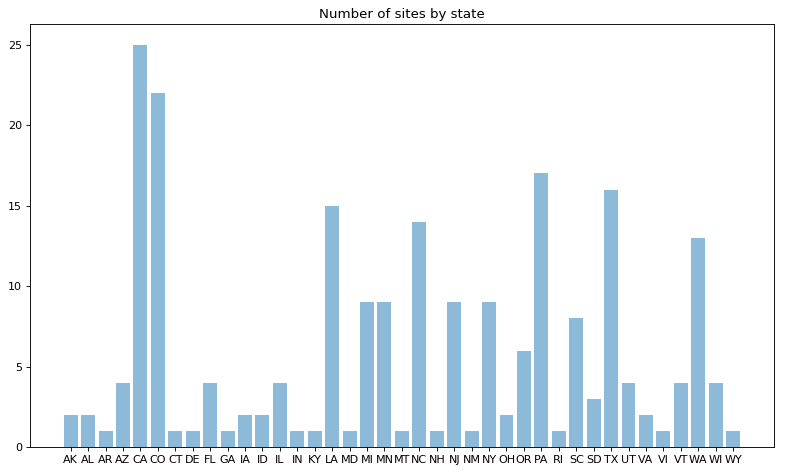

In [97]:
fig=plt.figure(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')

count_by_state = nfp_agency[['site_id', 'state']].groupby(['state']).agg({'site_id': 'count'})
y_pos = np.arange(len(count_by_state))
plt.bar(y_pos, count_by_state['site_id'], align='center', alpha=0.5)
plt.xticks(y_pos, count_by_state.index)
plt.title('Number of sites by state')

plt.show()

### Active Client

Active client status is determined when a client is currently enrolled in a site during the assessment period (program enddate is missing), they have had a completed visit in the last 180 days, index child is less than 26 months old and their total time in the program has not exceeded 1065 days. This dataset contains 12 consecutive months of active clients (those who meet the criteria above). Data provided in this dataset can provide insight into the proportion of clients in each program phase, the number of completed visits and the proportion of clients that are visited each month by the nurse.

| Variable          | Description                                                                                                                                                                                                                                                                                                                                                                                                                                 | Dataset  | Format    | 
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|-----------| 
| study_id          | This is the unique client ID that is assigned to a client at each agency. The client ID changes in the event that the client transfers to another site.                                                                                                                                                                                                                                                                                     | caseload | numeric   | 
| casenumber        | This is the unique client ID that is assigned to the client for a specific pregnancy. This client ID will follow the client through her experience in NFP (for that particular pregnancy). In the event the client transfers the casenumber will remain the same in the transfer agency.                                                                                                                                                    | caseload | character | 
| month             | The month of active client assessment.                                                                                                                                                                                                                                                                                                                                                                                                      | caseload | numeric   | 
| site_id           | Site identifier.                                                                                                                                                                                                                                                                                                                                                                                                                            | caseload | numeric   | 
| time_in_program   | The number of days in the program as of assessment date.                                                                                                                                                                                                                                                                                                                                                                                    | caseload | numeric   | 
| visit_count       | The number of visits during month.                                                                                                                                                                                                                                                                                                                                                                                                          | caseload | numeric   | 
| program_phase     | "The phase of program as of assessment date. In the event that the Estimated Delivery/Due Date (EDD) and the infant date of birth (DOB) are missing, this field will be missing. "                                                                                                                                                                                                                                                          | caseload | character | 
| days_last_visit   | "The days since clients' last visit. According to our active client definition, a client would be active as long as they have had a visit in the last 180 days. Therefore a client could be active for any given month but their most recent visit could be up to 180 days ago."                                                                                                                                                            | caseload | numeric   | 
| nurse_id          | "The nurse identified -- nurse who completed clients last visit. Note that this nurse may not be the nurse that is assigned to the particular client. In addition, if the client had not been seen for several months, it is possible that the nurse is no longer employed with NFP. It is also possible that another nurse or supervisor is covering the visit for a nurse who is on leave or vacation. This is a limitation of the data." | caseload | numeric   | 
| nurse_id_assigned | This is the nurse that has been assigned to the particular client during the month of assessment. Please note that in some instances the client will not have been assigned a nurse.                                                                                                                                                                                                                                                        | caseload | numeric   | 


In [8]:
active_client = pd.read_csv("data/ACTIVE_CLIENTS_TRAIN.csv")

In [104]:
active_client.head()

,study_id,casenumber,month,site_id,time_in_program,visit_count,program_phase,days_last_visit,nurse_id,nurse_id_assigned
0,47821000,CS_47822000,1,109,422,2,Toddlerhood,10,6165,6165
1,41958000,CS_41959000,1,109,731,1,Toddlerhood,29,6165,6165
2,15068000,CS_15069000,1,109,15,2,Pregnancy,5,6165,6165
3,34967000,CS_34968000,1,109,438,2,Infancy,3,6165,6165
4,101000,CS_102000,1,109,369,2,Infancy,4,6165,6165


### Client Demographics

This dataset provides information about each client with active status during the time period. We have provided demographics, information about client's baseline risks and their outcomes throughout their experience in the program. Please note: clients with missing data for any variables in this dataset are missing the info because it was either never assessed during their experience in the program or the information was skipped on the form. Clients who were retained for less time will have less information on client outcomes since these would not be assessed after they left the program. 

| Variable                     | Description                                                                                                                                                                                                                                                                                                                                                     | Format    | Datset       | Values                                                                                                                                                                                                                                                                                                                                                                                                                      | 
|------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|--------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------| 
| study_id                     | This is the unique client ID that is assigned to a client at each agency. The client ID changes in the event that the client transfers to another site. This variable should be joined to study_id in active client dataset.                                                                                                                                    | numeric   | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| casenumber                   | This is the unique client id that is assigned to the client for a specific pregnancy. This client id will follow the client through her experience in NFP (for that particular pregnancy). In the event the client transfers the casenumber will remain the same in the transfer agency. This variable should be joined to casenumber in active client dataset. | character | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| reasonfordismissal           | Reason client left NFP program- for dismissed clients only                                                                                                                                                                                                                                                                                                      | character | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| length_of_stay               | "Total Time in Program (days). Note for currently enrolled clients, time in program was calculated from their program start date to 11/30/2018. This value can exceed 1065 days. "                                                                                                                                                                              | numeric   | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| visit_count                  | Number of visits throughout program participation                                                                                                                                                                                                                                                                                                               | numeric   | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| transfer                     | Flag for whether or not client transferred to a new agency during the enrollment period                                                                                                                                                                                                                                                                         | numeric   | demographics | "1= Yes- transfer client, 0= No"                                                                                                                                                                                                                                                                                                                                                                                            | 
| gestation_at_enrollment      | The number of weeks gestation at enrollment . This is missing for clients enrolled after their infant was born (occurs mostly in Colorado (CO)) and for those with missing EDDs                                                                                                                                                                                 | numeric   | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| enrolled_after_birth         | Flag for enrollment after infant's birth (this occurs mostly in Colorado)                                                                                                                                                                                                                                                                                       | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| still_enrolled               | Flag for currently enrolled client at end of study period                                                                                                                                                                                                                                                                                                       | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| client_age                   | "Client's age at time of enrollment (years). Implasible/extreme values were deleted, therefore there can be some clients with missing age information. This is likely due to data entry errors "                                                                                                                                                                | numeric   | demographics | age range from 11-49.                                                                                                                                                                                                                                                                                                                                                                                                       | 
| preterm                      | "Flag for infant born preterm (<37 weeks).  If client is missing survey or question is unanswered, this field is missing. "                                                                                                                                                                                                                                     | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| initiated_bf                 | "Flag for initiation of breastfeeding at birth.  If client is missing survey or question is unanswered, this field is missing. "                                                                                                                                                                                                                                | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| bmi_cat                      | BMI Category  at baseline                                                                                                                                                                                                                                                                                                                                       | number    | demographics | "1= Underweight: < 18.5, 2= Normal: 18.5-24.9, 3= Overweight: 25- 29.9, 4= Obese: >=30"                                                                                                                                                                                                                                                                                                                                     | 
| weight_gain                  | Weight gain through pregnancy (in pounds)                                                                                                                                                                                                                                                                                                                       | numeric   | demographics |                                                                                                                                                                                                                                                                                                                                                                                                                             | 
| nicu_stay                    | Flag for infant stay in NICU                                                                                                                                                                                                                                                                                                                                    | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| immunization6mo              | "Flag for up-to-date immunizations at infants 6 months survey. If client is missing survey or question is unanswered, this field is missing. "                                                                                                                                                                                                                  | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| immunization12mo             | "Flag for up-to-date immunizations at infants 12 months survey. If client is missing survey or question is unanswered, this field is missing. "                                                                                                                                                                                                                 | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| homeless_any                 | Flag for homelessness (any report)                                                                                                                                                                                                                                                                                                                              | numeric   | demographics | "1= Yes, 0= No"                                                                                                                                                                                                                                                                                                                                                                                                             | 
| educationlvlbline            | Education attainment at baseline/intake                                                                                                                                                                                                                                                                                                                         | numeric   | demographics | "0 - No HS/GED, unknown last grade, 1 -Last grade: 1-8,  2 -Last grade: 9-11,  3 -Completed GED,  4 -Completed HS,  5 -Completed Vocational/Certification,  6 -Some college - no degree,   7 -College degree or higher "                                                                                                                                                                                                    | 
| educationlvlbline2           | Education attainment at baseline/intake (combined variable)                                                                                                                                                                                                                                                                                                     | numeric   | demographics | "1-Not Completed HS or GED, 2 -HS or GED, 3 -Vocational School, 4-Some College or a College degree (Associates, Bachelors +)"                                                                                                                                                                                                                                                                                               | 
| edenrollmentbline            | Client Enrolled in any education at baseline                                                                                                                                                                                                                                                                                                                    | numeric   | demographics | "0 - No, 1 - Yes"                                                                                                                                                                                                                                                                                                                                                                                                           | 
| edenrollmshsbline            | "Client Enrolled in Middle School, enrolled in High School, or not enrolled at baseline"                                                                                                                                                                                                                                                                        | numeric   | demographics | "1-Not enrolled, 2 - Yes - high school or GED program,  3 - Yes - middle school (6th - 8th grades)"                                                                                                                                                                                                                                                                                                                         | 
| changeineducation            | Change in education attainment and enrollment that occurred from intake to client's last follow-up - categorical                                                                                                                                                                                                                                                | numeric   | demographics | "0 - No HS/GED, did not complete HS/GED at last survey and not enrolled, 1 - No HS/GED at Intake but Completed a degree at Last Survey, 2 - No HS/GED at Intake but Enrolled in School at Last Survey, 3 - Completed HS/GED at Intake and no change to last survey, 4 - Completed HS/GED and Additional Degree at Last Survey, 5 - Completed HS/GED at Intake, No Additional Degree, but Enrolled In School at Last Survey" | 
| employmentbline              | Client is employed at intake (baseline)                                                                                                                                                                                                                                                                                                                         | numeric   | demographics | "0-Unemployment at Intake, 1- Employed at Intake"                                                                                                                                                                                                                                                                                                                                                                           | 
| employmenthrsbline           | Number of hours a client is employed at baseline/intake                                                                                                                                                                                                                                                                                                         | numeric   | demographics | "1-less than 10 hours per week,  2-10 - 19 hours per week,  3- 20 - 36 hours per week,  4-Full-Time"                                                                                                                                                                                                                                                                                                                        | 
| changeinemployment           | Change in employment occurred between intake and last follow-up survey - categorical                                                                                                                                                                                                                                                                            | numeric   | demographics | "0 - Unemployed at Intake and Unemployed at Last Survey, 1 - Employed at Intake and Unemployed at Last Survey, 2 - Unemployed at Intake and Employed at Last Survey, 3 - Employed at Intake and Employed at Last Survey"                                                                                                                                                                                                    | 
| maritalstatus                | Marital status at baseline                                                                                                                                                                                                                                                                                                                                      | numeric   | demographics | "0 - Not Married, 1- Married"                                                                                                                                                                                                                                                                                                                                                                                               | 
| race                         | Race                                                                                                                                                                                                                                                                                                                                                            | numeric   | demographics | "1-White, 2-Black, 3-Asian, 4-AIAN (American Indian/Alaskan Native), 5-NHPI (Native Hawaiian/Pacific Islander), 6-Multiple Races"                                                                                                                                                                                                                                                                                           | 
| ethnicity                    | Ethnicity                                                                                                                                                                                                                                                                                                                                                       | numeric   | demographics | "0-Not Hispanic or Latina, 1 - Hispanic or Latina"                                                                                                                                                                                                                                                                                                                                                                          | 
| raceethnicity                | Race Ethnicity combined                                                                                                                                                                                                                                                                                                                                         | numeric   | demographics | "1-Hispanic or Latina, 2-Non-Hispanic White,3- Non-Hispanic Black, 4-Non-Hispanic Other, 5-White Unknown Ethnicity, 6 - Black Unknown Ethnicity, 7 - Other Race, Unknown Ethnicity"                                                                                                                                                                                                                                         | 
| raceethnicity2               | Race Ethnicity combined- version 2                                                                                                                                                                                                                                                                                                                              | numeric   | demographics | "1-White Non-Hispanic, 2 - Black Non-Hispanic, 3 - Latina or Hispanic, 4-Ethnicity Unknown"                                                                                                                                                                                                                                                                                                                                 | 
| subsequentpreg18mo           | Subsequent pregnancy reported at some point between index birth and 18 months                                                                                                                                                                                                                                                                                   | numeric   | demographics | "1= Yes, 0=No"                                                                                                                                                                                                                                                                                                                                                                                                              | 
| smokespreg                   | Flag for having smoked within 48 hrs of the first survey (administered at intake)                                                                                                                                                                                                                                                                               | numeric   | demographics | "1= Yes, 0=No"                                                                                                                                                                                                                                                                                                                                                                                                              | 
| substanceusepreg             | Flag for having used a substance in the 14 days prior to first survey (at intake)                                                                                                                                                                                                                                                                               | numeric   | demographics | "1= Yes, 0=No"                                                                                                                                                                                                                                                                                                                                                                                                              | 
| alcoholusepreg               | Flag for having used alcohol  in the 14 days prior to first survey (at intake)                                                                                                                                                                                                                                                                                  | numeric   | demographics | "1= Yes, 0=No"                                                                                                                                                                                                                                                                                                                                                                                                              | 
| medicaid_any                 | Flag for Medicaid use at any point of NFP experience (for the mother or child)                                                                                                                                                                                                                                                                                  | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| schip_any                    | Flag for state child health insurance program use at any point of NFP experience (for the mother or child)                                                                                                                                                                                                                                                      | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| indian_health_any            | Flag for Indian Health Services use at any point of NFP experience (for the mother or child)                                                                                                                                                                                                                                                                    | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| wic_any                      | "Flag for Women, Infant, and Children program (WIC) use at any point of NFP experience (for the mother or child)"                                                                                                                                                                                                                                               | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| ccap_any                     | Flag for child care assistance use at any point of NFP experience                                                                                                                                                                                                                                                                                               | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| tanf_any                     | Flag for Temporary Assistance for Needy Families (TANF) use at any point of NFP experience                                                                                                                                                                                                                                                                      | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| ssi_any                      | Flag for social security income use at any point of NFP experience                                                                                                                                                                                                                                                                                              | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| special_needs_any            | Flag for special needs services use at any point of NFP experience (for the mother or child)                                                                                                                                                                                                                                                                    | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| early_intervention_child_any | Flag for Early Intervention Services use for the child at any point of NFP experience                                                                                                                                                                                                                                                                           | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| foodstamp_any                | Flag for foodstamp use at any point of NFP experience                                                                                                                                                                                                                                                                                                           | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| asq_referral                 | Flag for Ages and Stages Questionaire (ASQ) referral at any point. This is a developmental screener for a child at specific age points. If the child scores low on the screener the nurse should refer the client/child for additional developmental services outside of NFP.                                                                                   | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 
| asq_at_least_once            | Flag for completing at least one ASQ form at any point                                                                                                                                                                                                                                                                                                          | numeric   | demographics | "1= Yes, 0= No; No could be due to the client not using the service at any point, or due to the nurse not asking the client about that service specifically, or the client not mentioning during any visit that the client had used this service.  "                                                                                                                                                                        | 


In [10]:
client_demographics = pd.read_csv("data/CLIENT_DEMOGRAPHICS_TRAIN.csv")

In [11]:
client_demographics.head()

,study_id,casenumber,reasonfordismissal,length_of_stay,visit_count,transfer,gestation_at_enrollment,enrolled_after_birth,still_enrolled,client_age,...,indian_health_any,wic_any,ccap_any,tanf_any,ssi_any,special_needs_any,early_intervention_child_any,foodstamp_any,asq_referral,asq_at_least_once
0,17499000,CS_17500000,Child reached 2nd birthday,960,45,0,18.428571,0.0,0,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1259000,CS_1260000,Agency Closure,126,8,0,11.000000,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,10913000,CS_10914000,Child reached 2nd birthday,932,31,0,22.714286,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,30767000,CS_30768000,Child reached 2nd birthday,955,55,0,NaN,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,31520000,CS_31521000,Unable to locate,543,23,0,22.142857,0.0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
